<a href="https://colab.research.google.com/github/Muhammad-Usama-07/Data-Science-Journey/blob/main/Tools_%26_Techniques_for_DataScientist/LinearRegressionWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# Read Data

In [2]:
data = pd.read_csv('seattle-weather.csv')
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


# Stats of the Dataset

In [3]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


# 2d Plot to See Relationship Between Variables 

## Taking Minimum and  Maximum Temperature for Doing Analysis

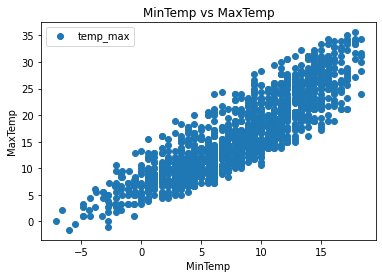

In [4]:
data.plot(x='temp_min', y='temp_max', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

# Dividing Data Into “Attributes” and “Labels”

In [6]:
X = data['temp_min'].values.reshape(-1,1) # attributes
y = data['temp_max'].values.reshape(-1,1) # labels

# Split Data into Trainig and Testing (80%, 20%) Respectively

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Training Data

In [8]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

# Slope and Intercept Value

In [9]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[6.00577259]
[[1.27128412]]


## Hence the Equation Becomes
  ### y = mx + c
  ### y = (1.27128412) * x + 6.00577259

# Predition on Test Data

In [10]:
y_pred = regressor.predict(X_test)

## Prediction Values

In [11]:
y_pred

array([[21.51543891],
       [15.92178876],
       [18.71861384],
       [15.92178876],
       [15.15901829],
       [14.52337622],
       [15.92178876],
       [24.31226398],
       [16.55743082],
       [11.59942274],
       [27.23621747],
       [12.36219321],
       [24.31226398],
       [27.23621747],
       [17.95584336],
       [17.3202013 ],
       [24.31226398],
       [12.36219321],
       [10.2010102 ],
       [17.95584336],
       [17.3202013 ],
       [12.36219321],
       [ 9.56536814],
       [25.07503446],
       [22.91385145],
       [24.31226398],
       [17.95584336],
       [13.76060575],
       [21.51543891],
       [12.36219321],
       [11.59942274],
       [14.52337622],
       [10.2010102 ],
       [ 9.56536814],
       [16.55743082],
       [15.92178876],
       [12.36219321],
       [16.55743082],
       [13.76060575],
       [17.3202013 ],
       [17.95584336],
       [11.59942274],
       [14.52337622],
       [ 7.40418512],
       [25.07503446],
       [ 8

# Compare Actual and Predicted Values using DataFrame

In [12]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,20.0,21.515439
1,10.6,15.921789
2,14.4,18.718614
3,23.9,15.921789
4,12.8,15.159018
...,...,...
288,10.6,11.599423
289,17.2,15.159018
290,22.8,18.718614
291,6.7,10.963781


# Visualize Comparison

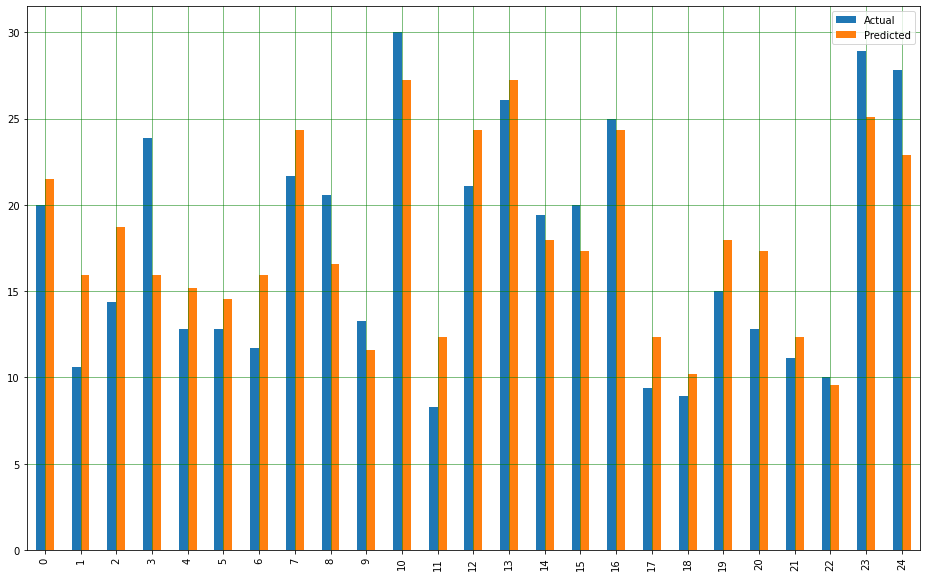

In [13]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Plot " Best Fit " line

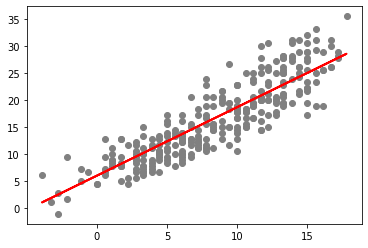

In [14]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

# Calculating
## Mean Absolute Error (MAE)
## Mean Squared Error (MSE)
## Root Mean Squared Error (RMSE)

In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.814461486372697
Mean Squared Error: 11.89886444956574
Root Mean Squared Error: 3.449473068392583
